![AIIG](http://www.lomalindaradiology.com/_/rsrc/1410937686854/about-us/mc-murrieta-0010000.jpg)

# Loma Linda Radiology AIIG

# Hands-on - Deep Learning for Intracranial Hemorrhage Detection

**Adopted from SIIM 2019**




**Step by step:**

All the process will be demonstrated with Python 3 running on Google Colaboratory. Please make sure you have GPU enabled under notebook settings before you proceed.

**Dataset:**

- Comprises 94 No-Tubes and 94 Tubes chest Xrays

/AIChestXray/Training/ = 114

/AIChestXray/Validation/ = 18

/AIChestXray/Test/ = 56

For each specific task we will import specific libraries.

##Dataset Download



In [1]:
#Installing dependencies

!pip3 install keras-vis
!pip3 install imgaug==0.2.5
!pip3 install scipy==1.2.1

print ('\033[1m' + 'Finished! Go to next step.')

     |████████████████████████████████| 563kB 43.3MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp36-none-any.whl size=561439 sha256=e7d9497a575e0087da113589d431666bb5d20c5f27e09ec961626666d8678523
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 24.8MB 1.2MB/s 
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
Finished! Go to next step.


In [2]:
#First of all, we are going to download the zip files with the images to this instance of Google's Colaboratory

!wget https://github.com/rnowrang/ML-Lines-and-Tubes/blob/master/AIChestXray.zip?raw=true 
#!wget https://github.com/kitamura-felipe/deeplearning_head_ct_demo/blob/master/33_33.zip?raw=true
#!wget https://github.com/kitamura-felipe/deeplearning_head_ct_demo/blob/master/60_6.zip?raw=true
  
print ('\033[1m' + 'Ready for next step!')

--2019-09-06 14:41:19--  https://github.com/rnowrang/ML-Lines-and-Tubes/blob/master/AIChestXray.zip?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rnowrang/ML-Lines-and-Tubes/raw/master/AIChestXray.zip [following]
--2019-09-06 14:41:19--  https://github.com/rnowrang/ML-Lines-and-Tubes/raw/master/AIChestXray.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rnowrang/ML-Lines-and-Tubes/master/AIChestXray.zip [following]
--2019-09-06 14:41:19--  https://raw.githubusercontent.com/rnowrang/ML-Lines-and-Tubes/master/AIChestXray.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... con

In [3]:
#Let's unzip them

!unzip AIChestXray.zip?raw=true -d /
#!unzip 33_33.zip?raw=true -d /
#!unzip 60_6.zip?raw=true -d /

print ('\033[1m' + 'Ready for next step!')

Archive:  AIChestXray.zip?raw=true
   creating: /AIChestXray/
  inflating: /AIChestXray/.DS_Store  
   creating: /__MACOSX/
   creating: /__MACOSX/AIChestXray/
  inflating: /__MACOSX/AIChestXray/._.DS_Store  
   creating: /AIChestXray/Test/
   creating: /AIChestXray/Test/Tube/
  inflating: /AIChestXray/Test/Tube/m_bloc1_c012f011.png  
   creating: /__MACOSX/AIChestXray/Test/
   creating: /__MACOSX/AIChestXray/Test/Tube/
  inflating: /__MACOSX/AIChestXray/Test/Tube/._m_bloc1_c012f011.png  
  inflating: /AIChestXray/Test/Tube/RMB-intubation-radiopedia-2.jpg  
  inflating: /__MACOSX/AIChestXray/Test/Tube/._RMB-intubation-radiopedia-2.jpg  
  inflating: /AIChestXray/Test/Tube/IndianJAnaesth_2012_56_1_58_93346_f3.jpg  
  inflating: /__MACOSX/AIChestXray/Test/Tube/._IndianJAnaesth_2012_56_1_58_93346_f3.jpg  
  inflating: /AIChestXray/Test/Tube/Post-chest-tube-placement-CXR.jpg  
  inflating: /__MACOSX/AIChestXray/Test/Tube/._Post-chest-tube-placement-CXR.jpg  
  inflating: /AIChestXray/Test/

##Experiment 1


### 1.1 - Preprocessing

Using TensorFlow backend.


Data Aug Off
Training set:
Found 114 images belonging to 2 classes.
Validation set:
Found 18 images belonging to 2 classes.
Test set:
Found 56 images belonging to 2 classes.


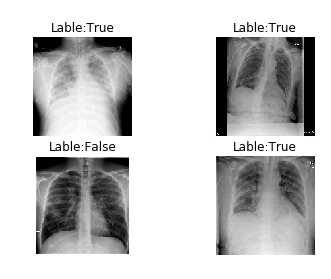

Ready for next step!


In [4]:
# Importing libraries for arrays (NumPy), Pre-processing (Keras) and plotting images (Matplotlib)

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# It is important to set a random seed in order to have reproducbility of training results between different users

from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

import warnings
warnings.filterwarnings('ignore')

# Dimensions which our images will be resized for the input. All of them must have the same size

img_width, img_height = 150, 150

# We split the data between 60/10/30% for training/validation/test sets 
# We choose which directories must be used

train_data_dir = '/AIChestXray/Training/'
nb_train_samples = 114

validation_data_dir = '/AIChestXray/Validation/'
nb_validation_samples = 18

test_data_dir = '/AIChestXray/Test/'
nb_test_samples = 56


# For generator we need to give these two hyperparameters
epochs = 40
batch_size = 5


# This is the augmentation configuration we will use for training
dataaug = 0

if dataaug == 0:
  print("Data Aug Off")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255) # normalization
elif dataaug == 2:
  print("Data Aug ON 2")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=1.0,
      height_shift_range=1.0,
      shear_range=0.2,
      zoom_range=1.0,
      rotation_range=90,
      horizontal_flip=True)
elif dataaug == 3:
  print("Data Aug ON 3")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      zoom_range=0.09)
else:
  print("Data Aug ON 1")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.02,
      zoom_range=0.05, 
      rotation_range=10,
      horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

test_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

print("Training set:")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Validation set:")
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Test set:")
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_test_samples,
    class_mode='binary', shuffle = False)

# Let's plot the first 4 generator outputs, defining the positive cases as Label = True and negatives as Label = False 

x,y = train_generator.next()
labley = y==1
for i in range(0, 4):
 plt.subplot(220 + 1 + i).grid(False)
 plt.imshow(x[i], cmap=plt.get_cmap('gray'))
 plt.title("\nLable:{}".format(labley[i]))
 plt.axis('off')

# show the plot
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 1.2 - Model Compilation

In [5]:
# Now we import keras modules for creating a linear stack of layer (Sequential)
# Then we import the specific layers we want to use in our model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K

# We define the size of the input of the Neural Net

img_width, img_height = 150, 150

# we could use 1 color channel instead of 3
# we are using 3 channels for simplifying transfer learning implementation

input_shape = (img_width, img_height, 3) # width, height, # of color channels

custom_model = Sequential()

# Below we have the first Convolutional Layer

custom_model.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_initializer="he_normal"))
custom_model.add(Activation('relu'))

# We then add a MaxPool layer, which will reduce the size of the output of the first conv layer in 75%.
# This is performed to avoid an exagerated increase in the number of parameters of the network.
# Don't worry if you do not understand in detail each one of these operations right now. Try to focus on the big picture.

custom_model.add(MaxPooling2D(pool_size=(2, 2)))

# We will add more convolutional layers, followed by MaxPool layers

custom_model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal"))
custom_model.add(Activation('relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

custom_model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal"))
custom_model.add(Activation('relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))


# Finally, we will add two dense layers, or 'Fully Connected Layers'.
# These layers are classical neural nets, without convolutions.

custom_model.add(Flatten())
custom_model.add(Dense(32, kernel_initializer="he_normal"))
custom_model.add(Activation('relu'))

# Dropout is an overfitting reduction technique.

custom_model.add(Dropout(0.2))

# Now, we will set the output o the network.
# The Dense function has the argument "1" because the net output is the hematoma x non-hematoma classification

custom_model.add(Dense(1))

# The output is either 0 or 1 and this can be obtained with a sigmoid function.

custom_model.add(Activation('sigmoid'))

# Let's compile the network.

custom_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print ('\033[1m' + 'Ready for next step!')

W0906 14:48:01.058780 139816185108352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 14:48:01.062672 139816185108352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 14:48:01.074471 139816185108352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4479: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0906 14:48:01.107007 139816185108352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0906 14:48:01.154138 139816185108352 deprec

Ready for next step!


### 1.3 - Training and Validation

In [6]:
# Now, let's train our Neural Net:

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='best_custom_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

hist = custom_model.fit_generator(
    train_generator,
    steps_per_epoch= 114 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[checkpointer])

print ('\033[1m' + 'Ready for next step!')

Epoch 1/40
22/22 [==============================] - 8s 366ms/step - loss: 0.8904 - acc: 0.5271 - val_loss: 0.7170 - val_acc: 0.5333

Epoch 00001: val_loss improved from inf to 0.71696, saving model to best_custom_model.hdf5
Epoch 2/40
22/22 [==============================] - 2s 78ms/step - loss: 0.6752 - acc: 0.5907 - val_loss: 0.5711 - val_acc: 0.9231

Epoch 00002: val_loss improved from 0.71696 to 0.57105, saving model to best_custom_model.hdf5
Epoch 3/40
22/22 [==============================] - 2s 80ms/step - loss: 0.5647 - acc: 0.6817 - val_loss: 0.5192 - val_acc: 0.8462

Epoch 00003: val_loss improved from 0.57105 to 0.51917, saving model to best_custom_model.hdf5
Epoch 4/40
22/22 [==============================] - 1s 66ms/step - loss: 0.4915 - acc: 0.7250 - val_loss: 0.5895 - val_acc: 0.6154

Epoch 00004: val_loss did not improve from 0.51917
Epoch 5/40
22/22 [==============================] - 2s 80ms/step - loss: 0.4305 - acc: 0.7999 - val_loss: 0.4656 - val_acc: 0.8000

Epoch 0

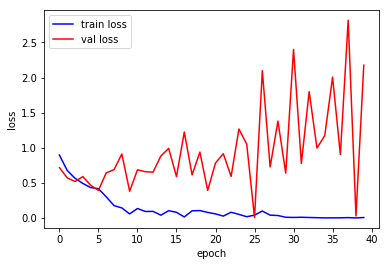

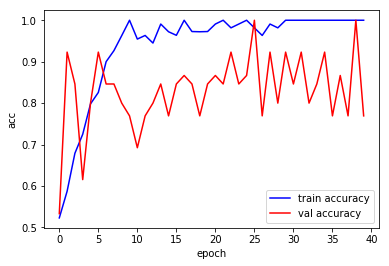

Best Validation Accuracy: 1.0
  
Ready for next step!


In [7]:
# Plotting the loss function

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend()
plt.show()

print('\033[1m' + "Best Validation Accuracy: " + str(hist.history['val_acc'][np.argmin(hist.history['val_loss'])]))
print("  ")
print ('\033[1m' + 'Ready for next step!')

### 1.4 - Performance Metrics

In [9]:
from keras.models import load_model

# Loading the best model

best_model = load_model('best_custom_model.hdf5')

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


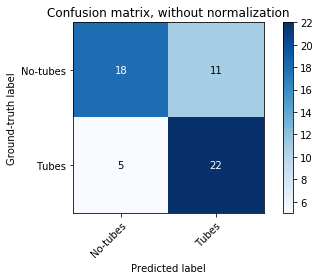

In [10]:
# Defining a function to plot a confusion matrix.

# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ground-truth label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  
X, Y = test_generator.next() # Get the X (images) and Y (labels) of the test set

labels_pred = best_model.predict(X) #predict the output from X

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

labels_test =  Y==1

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_pred.astype('int'), classes=['No-tubes','Tubes'], normalize=False,
                      title='Confusion matrix, without normalization')

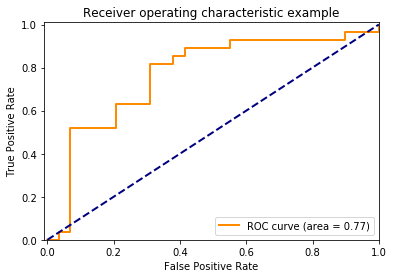

Accuracy: 0.7142857142857143
F1 Score: 0.7333333333333333


In [11]:
#Plotting the ROC curve with the AUC

labels_pred = best_model.predict(X) # predict again to get the original sigmoid output [0,1]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels_test, labels_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

f1_score = metrics.f1_score(labels_test, labels_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

accuracy = metrics.accuracy_score(labels_test, labels_pred)

print("Accuracy: " + str(accuracy))

print("F1 Score: " + str(f1_score))

##Experiment 5

In [0]:
#reset runtimes

import os
os.kill(os.getpid(), 9)

### 5.1 - Preprocessing

Using TensorFlow backend.


Data Aug ON 1
Training set:
Found 114 images belonging to 2 classes.
Validation set:
Found 18 images belonging to 2 classes.
Test set:
Found 56 images belonging to 2 classes.


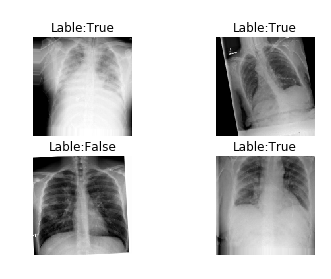

Ready for next step!


In [1]:
# Importing libraries for arrays (NumPy), Pre-processing (Keras) and plotting images (Matplotlib)

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# It is important to set a random seed in order to have reproducbility of training results between different users

from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

import warnings
warnings.filterwarnings('ignore')

# Dimensions which our images will be resized for the input. All of them must have the same size

img_width, img_height = 150, 150

# We split the data between 60/10/30% for training/validation/test sets 
# We choose which directories must be used

train_data_dir = '/AIChestXray/Training/'
nb_train_samples = 114

validation_data_dir = '/AIChestXray/Validation/'
nb_validation_samples = 18

test_data_dir = '/AIChestXray/Test/'
nb_test_samples = 56


# For generator we need to give these two hyperparameters
epochs = 40
batch_size = 5


# This is the augmentation configuration we will use for training
dataaug = 4

if dataaug == 0:
  print("Data Aug Off")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255) # normalization
elif dataaug == 2:
  print("Data Aug ON 2")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=1.0,
      height_shift_range=1.0,
      shear_range=0.2,
      zoom_range=1.0,
      rotation_range=90,
      horizontal_flip=True)  
else:
  print("Data Aug ON 1")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.02,
      zoom_range=0.05, 
      rotation_range=10,
      horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

test_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

print("Training set:")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Validation set:")
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Test set:")
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_test_samples,
    class_mode='binary', shuffle = False)

# Let's plot the first 4 generator outputs, defining the positive cases as Label = True and negatives as Label = False 

x,y = train_generator.next()
labley = y==1
for i in range(0, 4):
 plt.subplot(220 + 1 + i).grid(False)
 plt.imshow(x[i], cmap=plt.get_cmap('gray'))
 plt.title("\nLable:{}".format(labley[i]))
 plt.axis('off')

# show the plot
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 5.2 - Transfer Learning

In [2]:
# We can improve our results using transfer learning

from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

print ('\033[1m' + 'Ready for next step!')

W0906 06:20:32.772797 140056449566592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 06:20:32.774407 140056449566592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 06:20:32.778904 140056449566592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 06:20:32.821633 140056449566592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0906 06:20:33.234546 140056449566592 deprecation_wrapp

Ready for next step!


In [3]:
# Let's edit the last layers of VGG16 to use it in our solution

from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Only for version 2
x = Dense(1024, activation='relu')(x)

# And a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

SIIM_Net= Model(inputs=base_model.input, outputs=predictions)

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


In [4]:
# We can try using a different optimizer as well

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

SIIM_Net.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

print ('\033[1m' + 'Ready for next step!')

W0906 06:20:38.197560 140056449566592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 06:20:38.208512 140056449566592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Ready for next step!


### 5.3 - Training and Validation

In [5]:
# Time to train it

checkpointer = ModelCheckpoint(filepath='Best_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

hist = SIIM_Net.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size,
            callbacks=[checkpointer])

print ('\033[1m' + 'Ready for next step!')

Epoch 1/40
22/22 [==============================] - 8s 367ms/step - loss: 0.7004 - acc: 0.5275 - val_loss: 0.6882 - val_acc: 0.5333

Epoch 00001: val_loss improved from inf to 0.68824, saving model to Best_model.hdf5
Epoch 2/40
22/22 [==============================] - 3s 142ms/step - loss: 0.6738 - acc: 0.5751 - val_loss: 0.6606 - val_acc: 0.6923

Epoch 00002: val_loss improved from 0.68824 to 0.66056, saving model to Best_model.hdf5
Epoch 3/40
22/22 [==============================] - 3s 115ms/step - loss: 0.6493 - acc: 0.6501 - val_loss: 0.6881 - val_acc: 0.4615

Epoch 00003: val_loss did not improve from 0.66056
Epoch 4/40
22/22 [==============================] - 3s 116ms/step - loss: 0.6233 - acc: 0.6955 - val_loss: 0.5882 - val_acc: 0.8462

Epoch 00004: val_loss improved from 0.66056 to 0.58824, saving model to Best_model.hdf5
Epoch 5/40
22/22 [==============================] - 2s 111ms/step - loss: 0.5674 - acc: 0.7432 - val_loss: 0.5745 - val_acc: 0.6667

Epoch 00005: val_loss im

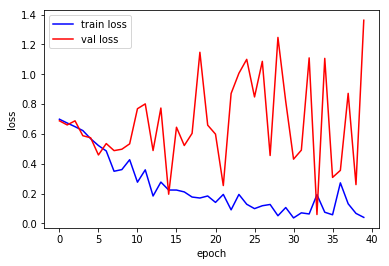

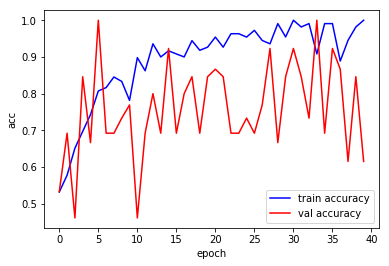

Best Validation Accuracy: 1.0
  
Ready for next step!


In [6]:
#Plotting the loss function

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend()
plt.show()


print('\033[1m' + "Best Validation Accuracy: " + str(hist.history['val_acc'][np.argmin(hist.history['val_loss'])]))
print("  ")


print ('\033[1m' + 'Ready for next step!')

### 5.4 - Performance Metrics

In [7]:
from keras.models import load_model

#Loading the best model

best_model = load_model('Best_model.hdf5')

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


Ready for next step!


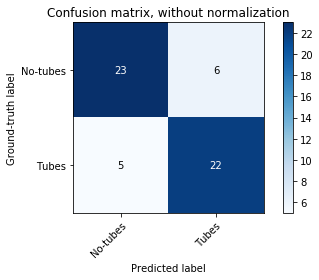

In [8]:
# Defining a function to plot a confusion matrix.

# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ground-truth label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

X, Y = test_generator.next() # Get the X (images) and Y (labels) of the test set

labels_pred = best_model.predict(X) #predict the output from X

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

labels_test = Y

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_pred.astype('int'), classes=['No-tubes','Tubes'], normalize=False,
                      title='Confusion matrix, without normalization')

print ('\033[1m' + 'Ready for next step!')

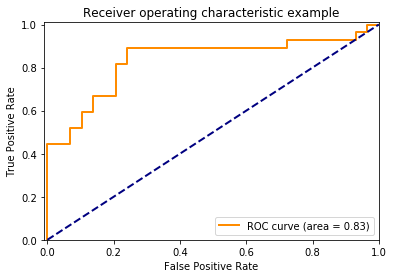

Accuracy: 0.8035714285714286
F1 Score: 0.7999999999999999
Ready for next step!


In [9]:
#Plotting the ROC curve with the AUC

labels_pred = best_model.predict(X) # predict again to get the original sigmoid output [0,1]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels_test, labels_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

f1_score = metrics.f1_score(labels_test, labels_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

accuracy = metrics.accuracy_score(labels_test, labels_pred)

print("Accuracy: " + str(accuracy))

print("F1 Score: " + str(f1_score))

print ('\033[1m' + 'Ready for next step!')

### 5.5 - Test Evaluation Transfer Learning

Found 56 images belonging to 2 classes.
Test group accuracy:  0.775
40/40 [==============================] - 0s 3ms/step


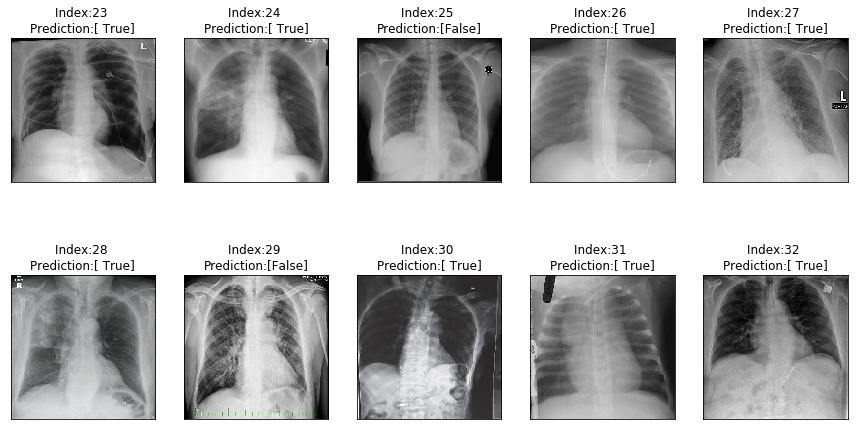

Ready for next step!


In [11]:
# Finally, we can use the test set for predictions

test_data_dir = '/AIChestXray/Test/' # location of test dataset

test_datagen = ImageDataGenerator(
         rescale=1./255)       # normalize pixel values to [0,1]

# Preparing test set images for prediction

itr = test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=40,
    shuffle='False',
    class_mode='binary')
batch_x, batch_y = itr.next()

print('Test group accuracy: ', best_model.evaluate(batch_x, batch_y, verbose=0)[1])



from random import randrange

prediction1 = np.round(best_model.predict(batch_x, verbose=1))==1


start_idx = randrange(batch_x.shape[0]-10) 
fig, ax = plt.subplots(2,5, figsize=(15,8))
for j in range(0,2): 
  for i in range(0,5):
     ax[j][i].xaxis.set_major_locator(plt.NullLocator())
     ax[j][i].yaxis.set_major_locator(plt.NullLocator())
     ax[j][i].imshow(batch_x[start_idx], cmap='gray')
     ax[j][i].set_title("Index:{} \nPrediction:{}".format(start_idx, prediction1[start_idx]))
     start_idx +=1
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 5.6 - Visualization

In [36]:
# Importing visualization tools

from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.layers import Input
from keras import activations
from keras.models import load_model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import initializers
from keras.models import Sequential, Model
from vis.visualization import visualize_activation,visualize_saliency,overlay,visualize_cam
from vis.utils import utils

import matplotlib.pyplot as plt
from keras.applications import imagenet_utils
import numpy as np

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


In [37]:
print(best_model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [38]:
layer_idx = utils.find_layer_idx(best_model, 'block5_conv3')
print("Remove Activation from Last Layer")
# Swap softmax with linear
best_model.layers[layer_idx].activation = activations.linear
print("Done. Now Applying changes to the model ...")
activation2_model = utils.apply_modifications(best_model)
print ('\033[1m' + 'Ready for next step!')

Remove Activation from Last Layer
Done. Now Applying changes to the model ...
Ready for next step!


['Normal/Normal-chest-X-ray-CXR.png', 'Normal/Normal-chest-x-ray.jpg', 'Normal/Normal_posteroanterior_(PA)_chest_radiograph_(X-ray).jpg']


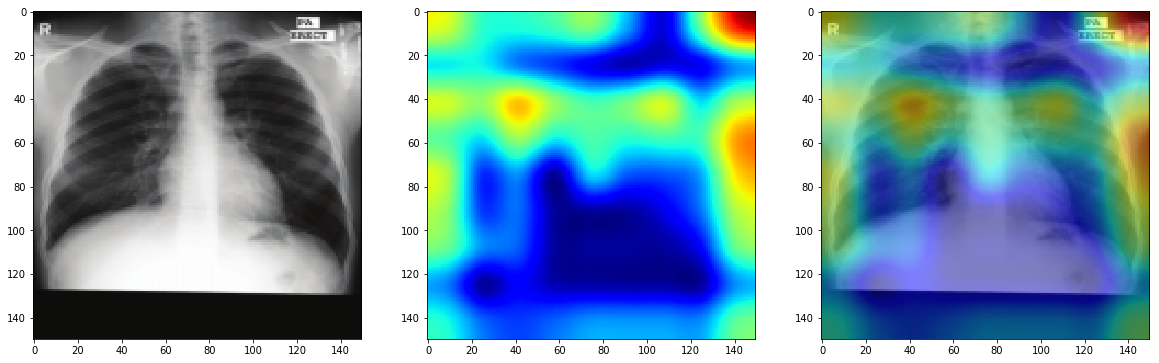

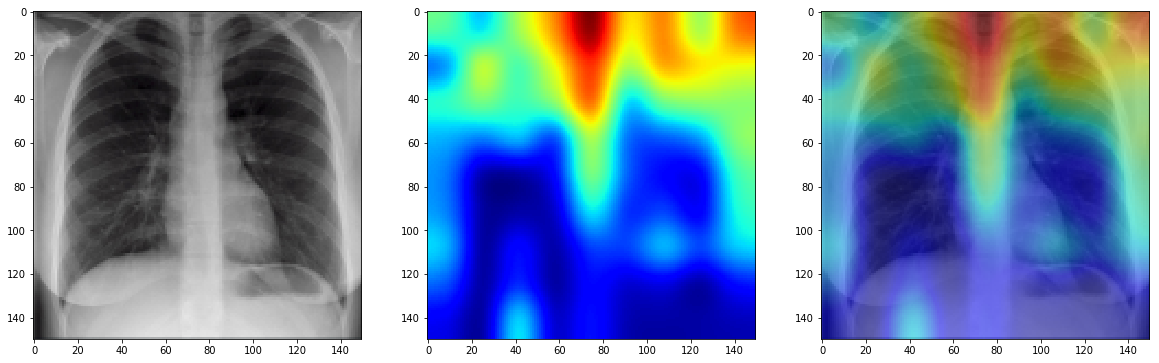

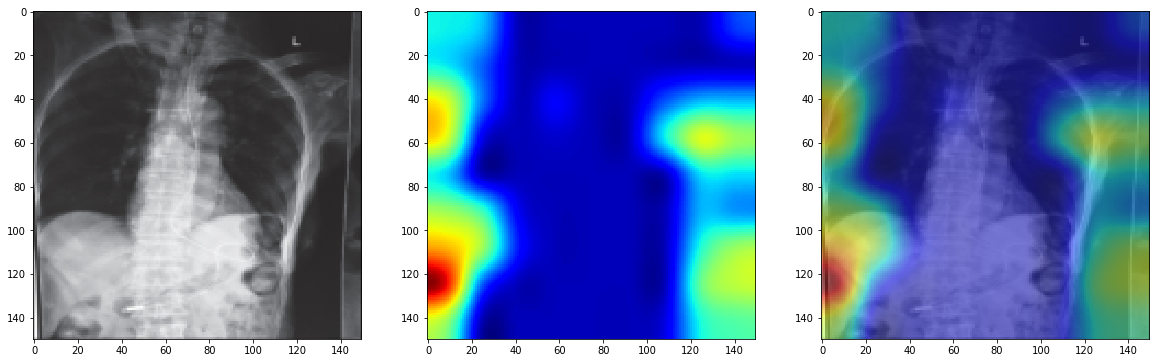

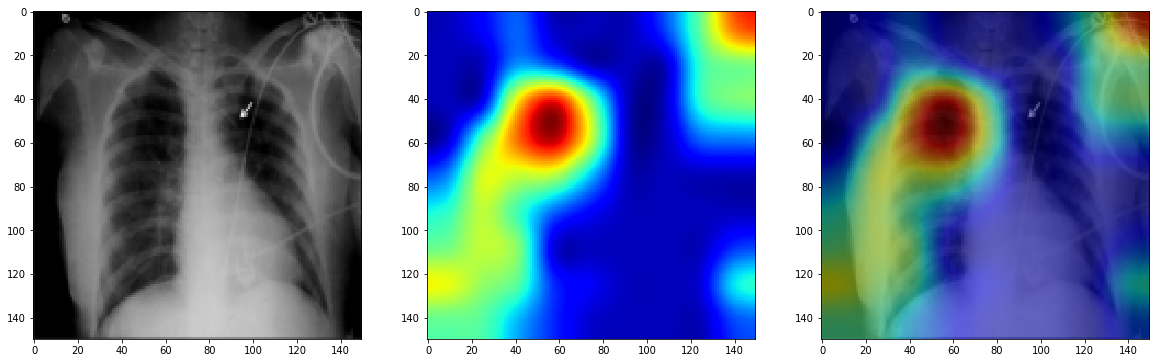


Congratulations, you have completed the assignment!


In [34]:
#print(activation_model.summary())
#im_files=['Normal/Normal-chest-X-ray-CXR.png', 'Normal/Normal-chest-x-ray.jpg', 'Normal/Normal_posteroanterior_(PA)_chest_radiograph_(X-ray).jpg']
import os
cwd = os.getcwd()
import os

dir_name='/AIChestXray/Test/'
im_files = test_generator.filenames
print(im_files[3:6])
for im_file in im_files[3:5]:
    img1 = image.load_img(dir_name + im_file,target_size=(150,150))
    img1 = image.img_to_array(img1)
    img1 = np.expand_dims(img1, axis=0)
    img1 = preprocess_input(img1)
    layer_idx = utils.find_layer_idx(activation2_model, 'block5_conv3')
    heatmap = visualize_cam(activation2_model, layer_idx, filter_indices=range(activation2_model.layers[layer_idx].filters), seed_input=img1[0,:,:,:])
    img_init=utils.load_img(dir_name + im_file,target_size=(150,150))
    img_init = img_init[:,:,:3]
    plt.figure(figsize=(20,20))
    ax1 = plt.subplot(1,3,1)
    ax1.grid(False)
    plt.imshow(img_init, cmap='gray')
    ax2 = plt.subplot(1,3,2)
    ax2.grid(False)
    plt.imshow(heatmap)
    ax3 = plt.subplot(1,3,3)
    ax3.grid(False)
    plt.imshow(overlay(img_init, heatmap))
    plt.show()

for im_file in im_files[35:37]:
    img1 = image.load_img(dir_name + im_file,target_size=(150,150))
    img1 = image.img_to_array(img1)
    img1 = np.expand_dims(img1, axis=0)
    img1 = preprocess_input(img1)
    layer_idx = utils.find_layer_idx(activation2_model, 'block5_conv3')
    heatmap = visualize_cam(activation2_model, layer_idx, filter_indices=range(activation2_model.layers[layer_idx].filters), seed_input=img1[0,:,:,:])
    img_init=utils.load_img(dir_name + im_file,target_size=(150,150))
    img_init = img_init[:,:,:3]
    plt.figure(figsize=(20,20))
    ax1 = plt.subplot(1,3,1)
    ax1.grid(False)
    plt.imshow(img_init, cmap='gray')
    ax2 = plt.subplot(1,3,2)
    ax2.grid(False)
    plt.imshow(heatmap)
    ax3 = plt.subplot(1,3,3)
    ax3.grid(False)
    plt.imshow(overlay(img_init, heatmap))
    plt.show()
print ('\n' + '\033[1m' + 'Congratulations, you have completed the assignment!')

from IPython.display import HTML
#HTML('<img src="https://media.giphy.com/media/cub3pntkz8muQ/giphy.gif">')